In [3]:
import pandas as pd
import plotly.express as px

In [5]:
df = pd.read_csv('./datasets/dataset_default.csv')
df.info()
print("\n")
print(df.head())
print("\n")
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5383 entries, 0 to 5382
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Puntaje crediticio        5383 non-null   float64
 1   Ingresos mensuales (USD)  5383 non-null   float64
 2   Monto del préstamo (USD)  5383 non-null   float64
 3   ¿Default/No default?      5383 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 168.3 KB


   Puntaje crediticio  Ingresos mensuales (USD)  Monto del préstamo (USD)  \
0                 5.3                    6074.6                   34159.9   
1                 4.1                    4955.0                   35168.6   
2                 4.4                    4573.6                   26852.8   
3                 3.1                    6019.0                   31500.9   
4                 5.0                    1481.1                   38094.6   

   ¿Default/No default?  
0                    

,Puntaje crediticio,Ingresos mensuales (USD),Monto del préstamo (USD),¿Default/No default?
count,5383.000000,5383.000000,5383.000000,5383.000000
mean,3.244380,3972.193721,37198.871540,0.507152
std,1.973642,1948.479996,7859.814765,0.499995
min,0.000000,1.400000,20023.400000,0.000000
25%,1.600000,2410.300000,31621.600000,0.000000
50%,3.200000,4416.400000,38418.300000,1.000000
75%,4.800000,5584.300000,43114.000000,1.000000
max,7.500000,6997.800000,49991.100000,1.000000


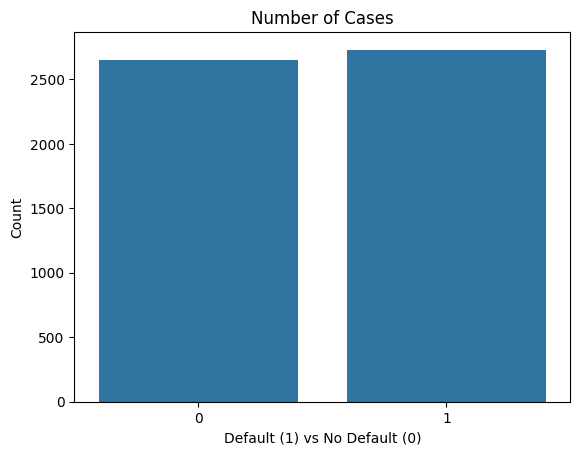

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='¿Default/No default?', data=df)
plt.xlabel('Default (1) vs No Default (0)')
plt.ylabel('Count')
plt.title('Number of Cases')
plt.show()

In [15]:
import plotly.io as pio
pio.renderers.default = "browser"
fig = px.scatter_3d(df, x='Puntaje crediticio', y='Ingresos mensuales (USD)',
                    z='Monto del préstamo (USD)', color='¿Default/No default?',
                    size_max=6, opacity = 0.5)
fig.show()

In [ ]:
#Entradas por un lado y salida por otro. Observar la diferencia de escala entre variables explicaticas
X = df.iloc[:,0:3].to_numpy()
Y = df.iloc[:,3].to_numpy()
X,Y

(array([[5.30000e+00, 6.07460e+03, 3.41599e+04],
        [4.10000e+00, 4.95500e+03, 3.51686e+04],
        [4.40000e+00, 4.57360e+03, 2.68528e+04],
        ...,
        [6.40000e+00, 6.81200e+02, 4.44232e+04],
        [2.50000e+00, 5.17200e+03, 2.48329e+04],
        [7.10000e+00, 3.55610e+03, 4.60615e+04]], shape=(5383, 3)),
 array([0, 0, 0, ..., 1, 0, 1], shape=(5383,)))

In [8]:
from sklearn.model_selection import train_test_split

def crear_train_val_test(X,Y):
    '''Crear los sets de entrenamiento (70%), validación (15%)
    y prueba (15%)'''
    xtr, x_resto, ytr, y_resto = train_test_split(X, Y, test_size=0.3,
                                                  random_state=22)
    xvl, xts, yvl, yts = train_test_split(x_resto, y_resto, test_size=0.5,
                                          random_state=22)

    return xtr, ytr, xvl, yvl, xts, yts

# Ejecutar la función
x_train, y_train, x_val, y_val, x_test, y_test = crear_train_val_test(X,Y)

# Verificar
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)

(3768, 3) (3768,)
(807, 3) (807,)
(808, 3) (808,)


In [11]:
import tensorflow as tf

def neurona_entrenar_validar(x_tr, y_tr, x_vl, y_vl):
    '''Crea y entrena una neurona artificial en Keras, con estas características:
    - Tamaño de la entrada: 3x1
    - Tamaño de la capa oculta: 2 neuronas
    - Tamaño de la salida: 1 neurona (default/no default)'''

    # Fijar semilla del generador aleatorio
    tf.keras.utils.set_random_seed(45)

    # Crear las neuronas del modelo
    modelo = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(3,1)), # Entrada
        tf.keras.layers.Dense(2, activation='relu'), # Capa oculta
        tf.keras.layers.Dense(1, activation='sigmoid') # Salida
        ])

    # Compilar el modelo
    modelo.compile(optimizer='sgd',
                    loss='BinaryCrossentropy',
                    metrics = ['accuracy'])

    # Entrenarlo
    modelo.fit(x_tr, y_tr, epochs=5, verbose=0)

    # Validarlo
    train_loss, train_acc = modelo.evaluate(x_tr, y_tr, verbose=0)
    val_loss, val_acc = modelo.evaluate(x_vl, y_vl, verbose=0)

    # Imprimir resultado en pantalla
    print(f'Exactitud entrenamiento/validación: {100*train_acc:.2f}% / {100*val_acc:.2f}%')


    return modelo

# Sin escalamiento
print('Desempeño SIN escalamiento de los datos de entrada: ')
red = neurona_entrenar_validar(x_train, y_train, x_val, y_val)

Desempeño SIN escalamiento de los datos de entrada: 


c:\Proyectos\PythonML\Clase\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Exactitud entrenamiento/validación: 51.09% / 49.07%


In [12]:
# Haremos escalamiento entre 0 y 1 (normalización)
from sklearn.preprocessing import MinMaxScaler

def escalar_datos(xtr, xvl, xts):
    '''Escalar datos de entrada (entrenamiento, validación y prueba)
    en el rango de 0 a 1'''
    scaler = MinMaxScaler()

    # Fit + transform sobre el set de entrenamiento
    xtr_s = scaler.fit_transform(xtr)

    # Transform sobre prueba y validación
    xvl_s = scaler.transform(xvl)
    xts_s = scaler.transform(xts)

    return xtr_s, xvl_s, xts_s

# Ejecutar la función
x_train_s, x_val_s, x_test_s = escalar_datos(x_train, x_val, x_test)

# Verificar
print(x_train_s.min(axis=0),x_train_s.max(axis=0))
print(x_val_s.min(axis=0),x_val_s.max(axis=0))
print(x_test_s.min(axis=0),x_test_s.max(axis=0))

[0. 0. 0.] [1. 1. 1.]
[ 0.          0.00147219 -0.00060112] [1.         0.99745583 0.99843041]
[0.         0.00012864 0.00688616] [1.         1.         1.00018702]


In [13]:
# Con escalamiento
print('-'*40)
print('Desempeño CON escalamiento de los datos de entrada: ')
red_s = neurona_entrenar_validar(x_train_s, y_train, x_val_s, y_val)

----------------------------------------
Desempeño CON escalamiento de los datos de entrada: 


c:\Proyectos\PythonML\Clase\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Exactitud entrenamiento/validación: 91.08% / 91.70%
